## Libraries
- yfinance: It's an open-source tool that uses Yahoo's publicly available APIs for stock data
- pandas: It is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
- matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

In [32]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Get data by yfinance

In [34]:
# Get the TSM stock from 2020/1/1 to 2022/1/1
# Date is the index of the dataframe
tsm = yf.download("TSM", start='2020-01-01', end='2022-01-01')
tsm

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,59.599998,60.119999,59.599998,60.040001,56.669682,8432600
2020-01-03 00:00:00-05:00,58.970001,58.980000,58.040001,58.060001,54.800827,10546400
2020-01-06 00:00:00-05:00,57.599998,57.689999,57.130001,57.389999,54.168430,8897200
2020-01-07 00:00:00-05:00,57.450001,58.599998,56.740002,58.320000,55.046234,7444300
2020-01-08 00:00:00-05:00,58.189999,58.980000,58.110001,58.750000,55.452095,5381500
...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,121.220001,123.260002,121.199997,122.699997,120.788139,6309900
2021-12-28 00:00:00-05:00,123.379997,123.660004,121.870003,122.059998,120.158104,6321000
2021-12-29 00:00:00-05:00,121.800003,123.150002,120.970001,121.410004,119.518242,5847700


In [35]:
# Summary Stats for TSM stocks
tsm.describe()


,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,94.352852,95.380436,93.156970,94.243149,91.309974,9.510463e+06
std,28.175141,28.415441,27.784696,28.074546,27.935140,4.520092e+06
min,43.740002,45.180000,42.700001,43.889999,41.819286,3.172100e+06
25%,60.160000,60.639999,59.919998,60.320000,56.933956,6.523200e+06
50%,108.000000,109.669998,107.580002,108.209999,105.520927,8.424900e+06
75%,118.230003,119.180000,116.650002,118.199997,115.307266,1.102660e+07
max,141.610001,142.199997,139.419998,140.050003,135.704376,4.122680e+07


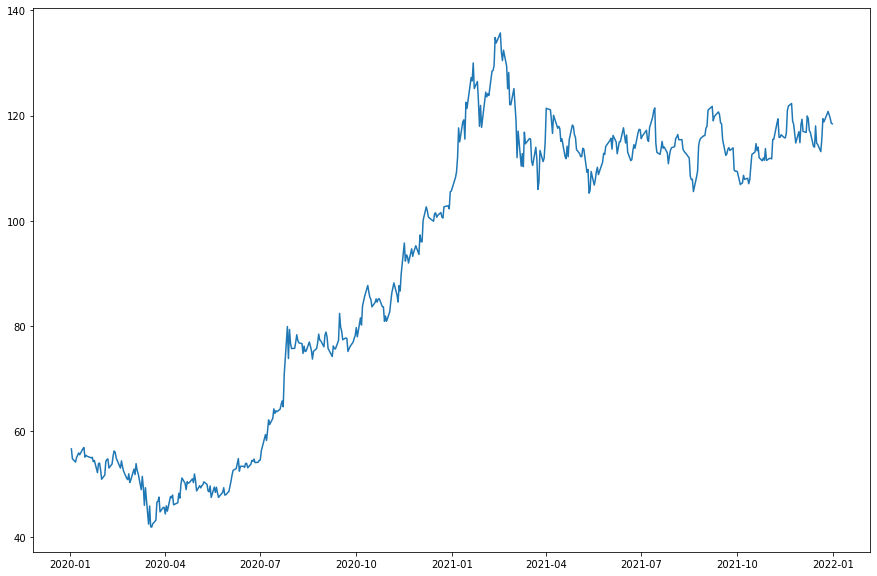

In [36]:
# Historical view of the closing price of stock
plt.plot(
        tsm.index,       # x-axis
        tsm['Adj Close'] # y-axis
    )

## Data Preprocessing

In [37]:
# Calculation of moving averages for 5 days of stocks
ma =[1,5,20,60]
for i in ma:
    column_name = "MA for %s days" %(str(i))    
    tsm[column_name] = tsm['Adj Close'].rolling(window=i).mean()
    tsm

In [38]:
# Use lambda function to create a column for color
# red: Open > Close
# blue: Open <= Close

def compare_open_and_close_price(open_price, close_price):
    return 'red' if open_price>close_price else '#4169e1'

tsm['color'] = tsm.apply(lambda x: compare_open_and_close_price(x['Open'], x['Close']), axis=1)
tsm

,Open,High,Low,Close,Adj Close,Volume,MA for 1 days,MA for 5 days,MA for 20 days,MA for 60 days,color
Date,,,,,,,,,,,
2020-01-02 00:00:00-05:00,59.599998,60.119999,59.599998,60.040001,56.669682,8432600,56.669682,NaN,NaN,NaN,#4169e1
2020-01-03 00:00:00-05:00,58.970001,58.980000,58.040001,58.060001,54.800827,10546400,54.800827,NaN,NaN,NaN,red
2020-01-06 00:00:00-05:00,57.599998,57.689999,57.130001,57.389999,54.168430,8897200,54.168430,NaN,NaN,NaN,red
2020-01-07 00:00:00-05:00,57.450001,58.599998,56.740002,58.320000,55.046234,7444300,55.046234,NaN,NaN,NaN,#4169e1
2020-01-08 00:00:00-05:00,58.189999,58.980000,58.110001,58.750000,55.452095,5381500,55.452095,55.227454,NaN,NaN,#4169e1
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,121.220001,123.260002,121.199997,122.699997,120.788139,6309900,120.788139,117.551370,116.980500,114.628832,#4169e1
2021-12-28 00:00:00-05:00,123.379997,123.660004,121.870003,122.059998,120.158104,6321000,120.158104,118.953181,117.141521,114.808645,red
2021-12-29 00:00:00-05:00,121.800003,123.150002,120.970001,121.410004,119.518242,5847700,119.518242,119.734810,117.374957,115.019296,red


In [39]:
# Change the column name from 'Adj Close' to 'MA for 1 days'
tsm=tsm.rename(columns = {'Adj Close':'MA for 1 days'})
tsm

,Open,High,Low,Close,MA for 1 days,Volume,MA for 1 days,MA for 5 days,MA for 20 days,MA for 60 days,color
Date,,,,,,,,,,,
2020-01-02 00:00:00-05:00,59.599998,60.119999,59.599998,60.040001,56.669682,8432600,56.669682,NaN,NaN,NaN,#4169e1
2020-01-03 00:00:00-05:00,58.970001,58.980000,58.040001,58.060001,54.800827,10546400,54.800827,NaN,NaN,NaN,red
2020-01-06 00:00:00-05:00,57.599998,57.689999,57.130001,57.389999,54.168430,8897200,54.168430,NaN,NaN,NaN,red
2020-01-07 00:00:00-05:00,57.450001,58.599998,56.740002,58.320000,55.046234,7444300,55.046234,NaN,NaN,NaN,#4169e1
2020-01-08 00:00:00-05:00,58.189999,58.980000,58.110001,58.750000,55.452095,5381500,55.452095,55.227454,NaN,NaN,#4169e1
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,121.220001,123.260002,121.199997,122.699997,120.788139,6309900,120.788139,117.551370,116.980500,114.628832,#4169e1
2021-12-28 00:00:00-05:00,123.379997,123.660004,121.870003,122.059998,120.158104,6321000,120.158104,118.953181,117.141521,114.808645,red
2021-12-29 00:00:00-05:00,121.800003,123.150002,120.970001,121.410004,119.518242,5847700,119.518242,119.734810,117.374957,115.019296,red


## Visualization
- plt: matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB.

In [40]:
# Define the color by map
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#4169e1', 'orange': '#ffa320', 'green': '#00ec8b'}
style={'0':'-','1':'.'}

MA(1)
MA(5)
MA(20)
MA(60)


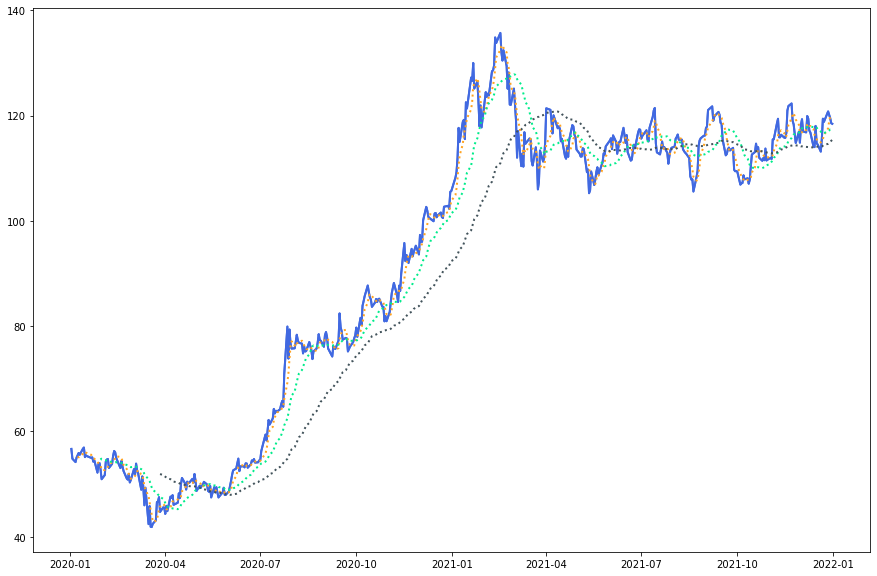

In [41]:
# Show 1MA and 5MA line chart
mov_avg = {
        'MA(1)': {'Range':1,'Color':colors['blue'],'style':'-'},
        'MA(5)': {'Range':5,'Color':colors['orange'],'style':':'},
        'MA(20)': {'Range':20,'Color':colors['green'],'style':':'},
        'MA(60)': {'Range':60,'Color':colors['grey'],'style':':'}
          }

date = tsm.index

for ma, ma_info in mov_avg.items():
    print(ma)
    column_name="MA for %s days" %(str(ma_info['Range']))    
    plt.plot(
            date, 
            tsm[column_name], 
            color=ma_info['Color'], 
            label=ma, 
            linewidth=2,
            linestyle=ma_info['style']
            )

<BarContainer object of 505 artists>

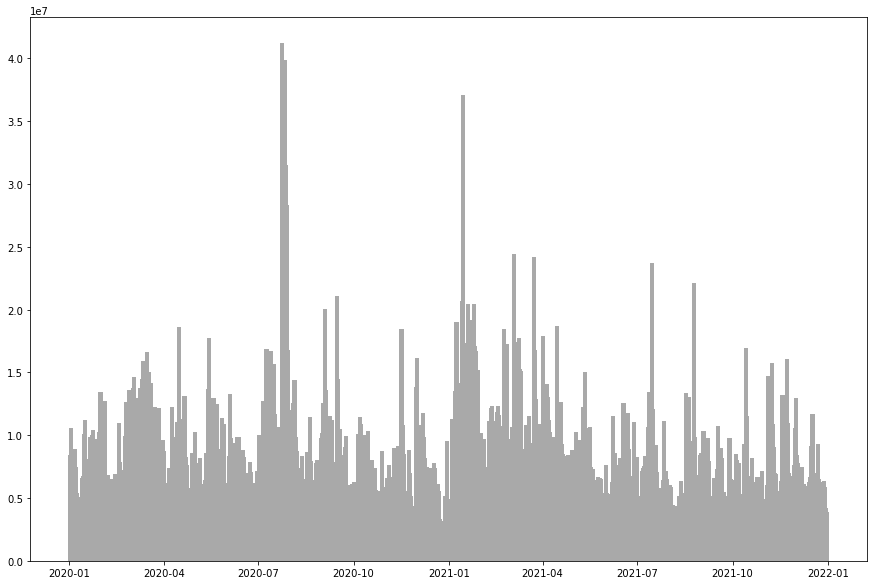

In [42]:
# Volumn bar plot
vol = tsm['Volume']

vol_plot = plt.bar(date, vol, width=4, color='darkgrey')
vol_plot

<BarContainer object of 505 artists>

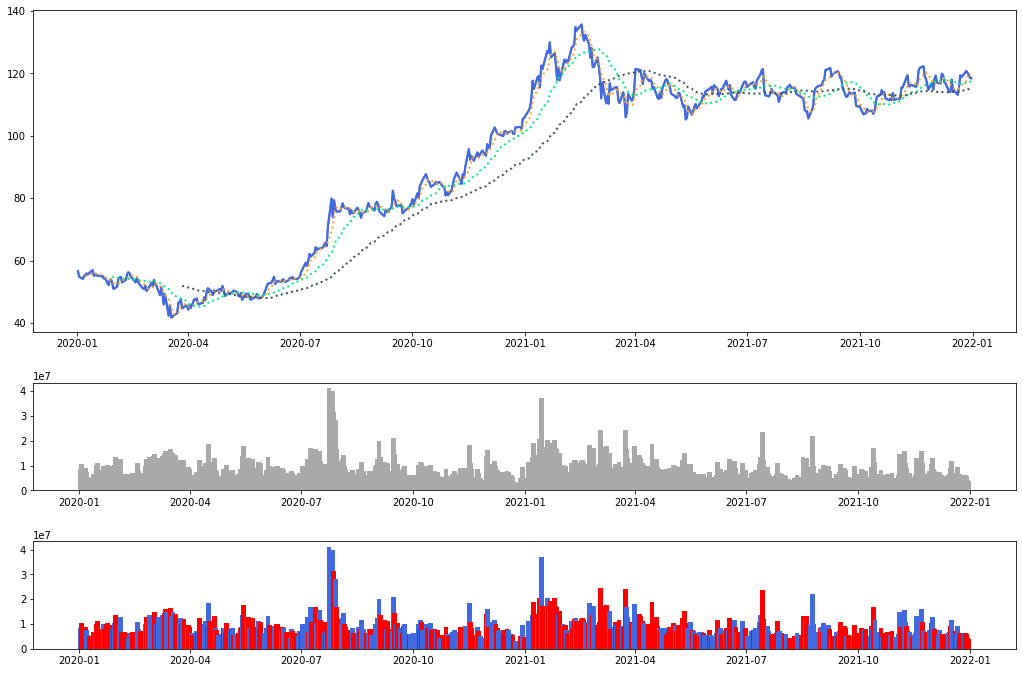

In [43]:
# Combine prices and volumes in one figure

# The setting of figure
plt.rc('figure', figsize=(15, 10))

# Create a figure and a set of subplots.
fig, axes = plt.subplots(
    3, # rows
    1, # columns
    gridspec_kw={'height_ratios': [3,1,1]} # Defines the relative heights of the rows
)

# Adjust the padding between and around subplots.
fig.tight_layout(pad=3)

# subplot 1
plot_close_price = axes[0]
for ma, ma_info in mov_avg.items():
    column_name = "MA for %s days" %(str(ma_info['Range']))    
    plot_close_price.plot(
        date, tsm[column_name], 
        color=ma_info['Color'], label=ma, linewidth=2,linestyle=ma_info['style']
    )

# subplot 2
plot_vol = axes[1]
plot_vol.bar(date, vol, width=4, color='darkgrey')
# subplot 3

plot_vol = axes[2]
plot_vol.bar(date, vol, width=4, color=tsm['color'])